# Base Modeling
Created by: Pat PascuaL


In [52]:
# general libraries
import re
import time
import json
import pickle
import warnings
import numpy as np
import pandas as pd
from tqdm.notebook import tqdm
from collections import Counter
warnings.filterwarnings("ignore")

# visualizations
import seaborn as sns
from termcolor import colored
import matplotlib.pyplot as plt
import plotly.graph_objects as go

# modelling
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import (train_test_split, GridSearchCV,
                                     StratifiedKFold)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (RandomForestClassifier,
                              GradientBoostingClassifier)
from sklearn.model_selection import cross_validate
from sklearn.metrics import (ConfusionMatrixDisplay, precision_score, recall_score)

# imbalanced techniques
from imblearn.pipeline import Pipeline, make_pipeline
from imblearn.over_sampling import (SMOTE, ADASYN, BorderlineSMOTE, SVMSMOTE)
from imblearn.under_sampling import (TomekLinks, NearMiss, AllKNN,
                                     EditedNearestNeighbours,
                                     RepeatedEditedNearestNeighbours)
from imblearn.combine import SMOTETomek, SMOTEENN



In [53]:
raw = pd.read_csv('df_raw.csv')
clean = pd.read_csv('df_cleaned.csv')

In [54]:
raw.head()

,Feature_ae_0,Feature_dn_1,Feature_cn_2,Feature_ps_3,Feature_ps_4,Feature_ee_5,Feature_cx_6,Feature_cx_7,Feature_em_8,Feature_nd_9,...,Feature_md_17_Cat_6_m***y,Feature_md_17_Cat_7_n***v,Feature_md_17_Cat_8_o***t,Feature_md_17_Cat_9_s***p,Feature_dd_18_Cat_1_m***n,Feature_dd_18_Cat_2_t***u,Feature_dd_18_Cat_3_t***e,Feature_dd_18_Cat_4_w***d,Feature_pd_19_Cat_1_n***t,Feature_pd_19_Cat_2_s***s
0,1.627455,0.437448,-0.564554,0.195573,1.668929,-1.197216,-1.180303,-1.229706,-1.338106,-0.941368,...,True,False,False,False,True,False,False,False,False,False
1,1.435649,0.104904,-0.203244,0.195573,-0.351001,0.648782,0.722754,0.891772,0.714889,0.332017,...,True,False,False,False,False,True,False,False,True,False
2,-0.674223,-0.796060,-0.564554,0.195573,1.668929,-1.197216,-1.180303,-1.229706,-1.330035,-0.941368,...,True,False,False,False,False,False,False,False,False,False
3,-0.386513,0.375579,0.519376,0.195573,-0.351001,0.839748,1.536869,-0.277205,0.776577,0.846082,...,False,False,False,False,False,False,False,False,True,False
4,-1.249642,-0.266309,-0.203244,0.195573,-0.351001,0.839748,0.591390,-0.472035,0.774271,0.846082,...,False,False,False,False,False,False,False,False,True,False


In [55]:
clean.head()

,Response,Feature_cx_6_std,Feature_cx_7_std,month_Cat_0_a***r,month_Cat_1_a***g,month_Cat_2_d***c,month_Cat_3_j***l,month_Cat_4_j***n,month_Cat_5_m***r,month_Cat_6_m***y,month_Cat_7_n***v,month_Cat_8_o***t,month_Cat_9_s***p,previous_campaign_Cat_0_f***e,previous_campaign_Cat_1_n***t,previous_campaign_Cat_2_s***s,age_encoded,duration_encoded,interest_rate_encoded
0,0,-1.180303,-1.229706,False,False,False,False,False,False,True,False,False,False,True,False,False,3,2,0
1,0,0.722754,0.891772,False,False,False,False,False,False,True,False,False,False,False,True,False,3,1,2
2,0,-1.180303,-1.229706,False,False,False,False,False,False,True,False,False,False,True,False,False,1,0,1
3,0,1.536869,-0.277205,False,False,False,False,True,False,False,False,False,False,False,True,False,1,2,4
4,0,0.591390,-0.472035,False,False,False,True,False,False,False,False,False,False,False,True,False,0,1,4


Response Counts:       0
0  31060
1   3929
Proportion Chance Criterion: 80.06%
1.25 * Proportion Chance Criterion: 100.08%


<Figure size 800x600 with 0 Axes>

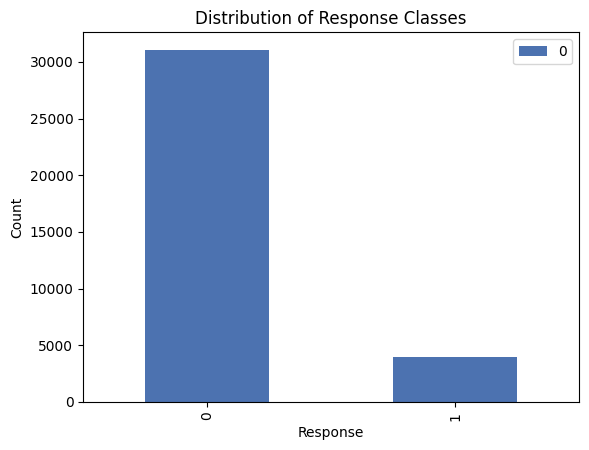

In [56]:
# Count responses
response_counts = Counter(clean['Response'])
response_df = pd.DataFrame.from_dict(response_counts, orient='index')

# Plot response distribution
plt.figure(figsize=(8, 6))
response_df.plot(kind='bar', color='#4C72B0')  # Using the blue color from the image
plt.title('Distribution of Response Classes')
plt.xlabel('Response')
plt.ylabel('Count')

# Calculate proportion chance criterion
num = (response_df[0]/response_df[0].sum())**2

print("Response Counts:{}".format(response_df))

print("Proportion Chance Criterion: {:0.2f}%".format(100*num.sum()))
print("1.25 * Proportion Chance Criterion: {:0.2f}%".format(1.25*100*num.sum()))

# Interpretation:
# The Proportion Chance Criterion (PCC) represents the accuracy that would be achieved by randomly 
# guessing based on the observed class proportions in the dataset. For example, if 80% of cases are
# class 0, randomly guessing class 0 every time would give 80% accuracy.
#
# The 1.25 * PCC threshold is commonly used as a minimum performance benchmark - any useful model
# should perform at least 25% better than random guessing. This helps determine if the model has
# actually learned meaningful patterns in the data rather than just reflecting class imbalances.

In [57]:
# Split data into train-validation-holdout sets
X = clean.drop(['Response'], axis=1)
y = clean['Response']

# First split: separate holdout set (75% train+val, 25% holdout)
X_trainval, X_holdout, y_trainval, y_holdout = train_test_split(
    X, y,
    test_size=0.25,  # 25% holdout
    random_state=11,
    stratify=y  # Maintain class distribution
)

In [58]:
# Split raw data into train-validation-holdout sets
X_raw = raw.drop(['Response'], axis=1)
y_raw = raw['Response']

# First split: separate holdout set (75% train+val, 25% holdout) 
X_trainval_raw, X_holdout_raw, y_trainval_raw, y_holdout_raw = train_test_split(
    X_raw, y_raw,
    test_size=0.25,  # 25% holdout
    random_state=11,
    stratify=y_raw  # Maintain class distribution
)


In [59]:
def auto_ml(X_trainval, y_trainval, models_dict, cv=None, res_t=None):
    """Apply ML models with optional resampling"""
    from sklearn.metrics import f1_score, precision_score, recall_score, roc_auc_score
    results = {}
    
    # For each model
    for model_name, model in tqdm(models_dict.items()):
        model_start = time.time()
        
        # Initialize metric lists
        train_scores, val_scores = [], []
        train_recall, val_recall = [], []
        train_precision, val_precision = [], []
        train_f1, val_f1 = [], []
        train_roc_auc, val_roc_auc = [], []
        
        # For each fold
        for train_index, val_index in tqdm(cv.split(X_trainval, y_trainval)):
            X_train, X_val = X_trainval.iloc[train_index], X_trainval.iloc[val_index]
            y_train, y_val = y_trainval.iloc[train_index], y_trainval.iloc[val_index]

            # Apply resampling
            if res_t is not None:
                X_train, y_train = res_t.fit_resample(X_train, y_train)

            # Fit and predict
            model.fit(X_train, y_train)
            train_preds = model.predict(X_train)
            val_preds = model.predict(X_val)
            
            # Get probability predictions for ROC AUC
            train_probs = model.predict_proba(X_train)[:,1]
            val_probs = model.predict_proba(X_val)[:,1]

            # Calculate metrics
            train_scores.append(model.score(X_train, y_train))
            val_scores.append(model.score(X_val, y_val))
            train_recall.append(recall_score(y_train, train_preds, average='weighted'))
            val_recall.append(recall_score(y_val, val_preds, average='weighted'))
            train_precision.append(precision_score(y_train, train_preds, average='weighted'))
            val_precision.append(precision_score(y_val, val_preds, average='weighted'))
            train_f1.append(f1_score(y_train, train_preds, average='weighted'))
            val_f1.append(f1_score(y_val, val_preds, average='weighted'))
            train_roc_auc.append(roc_auc_score(y_train, train_probs))
            val_roc_auc.append(roc_auc_score(y_val, val_probs))

        # Store aggregated results
        results[model_name] = {
            'Train Accuracy': f"{np.mean(train_scores)*100:.2f}%",
            'Val Accuracy': f"{np.mean(val_scores)*100:.2f}%",
            'Train Recall': f"{np.mean(train_recall)*100:.2f}%", 
            'Train Precision': f"{np.mean(train_precision)*100:.2f}%",
            'Train F1': f"{np.mean(train_f1)*100:.2f}%",
            'Train ROC AUC': f"{np.mean(train_roc_auc):.3f}",
            'Train GINI': f"{2*np.mean(train_roc_auc)-1:.3f}",
            'Val Recall': f"{np.mean(val_recall)*100:.2f}%",
            'Val Precision': f"{np.mean(val_precision)*100:.2f}%",
            'Val F1': f"{np.mean(val_f1)*100:.2f}%",
            'Val ROC AUC': f"{np.mean(val_roc_auc):.3f}",
            'Val GINI': f"{2*np.mean(val_roc_auc)-1:.3f}",
            'Total Time': f"{time.time() - model_start:.2f}s"
        }

    return pd.DataFrame(results).T

In [60]:
models_dict = {'LogisticRegressor': LogisticRegression(),
               'GaussianNB': GaussianNB(),
               'RandomForestClassifier': RandomForestClassifier(random_state=143),
               'DecisionTreeClassifier': DecisionTreeClassifier(random_state=143),
               'GradientBoostingClassifier': GradientBoostingClassifier(random_state=143)}

In [61]:
auto_run = auto_ml(X_trainval, y_trainval, models_dict,
                   cv=StratifiedKFold(n_splits=5))
# Display the results
display(auto_run)

  0%|          | 0/5 [00:00<?, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

,Train Accuracy,Val Accuracy,Train Recall,Train Precision,Train F1,Train ROC AUC,Train GINI,Val Recall,Val Precision,Val F1,Val ROC AUC,Val GINI,Total Time
LogisticRegressor,90.50%,90.48%,90.50%,88.99%,88.97%,0.895,0.790,90.48%,88.95%,88.93%,0.894,0.789,0.48s
GaussianNB,87.73%,87.73%,87.73%,86.62%,87.10%,0.847,0.694,87.73%,86.63%,87.10%,0.846,0.691,0.32s
RandomForestClassifier,91.54%,90.04%,91.54%,90.54%,90.27%,0.925,0.849,90.04%,88.31%,88.49%,0.893,0.786,5.10s
DecisionTreeClassifier,91.54%,90.02%,91.54%,90.65%,90.06%,0.926,0.851,90.02%,88.19%,88.22%,0.866,0.731,0.31s
GradientBoostingClassifier,90.88%,90.69%,90.88%,89.59%,89.62%,0.912,0.824,90.69%,89.32%,89.41%,0.907,0.813,3.92s


In [62]:
# Run models on raw data
raw_models_dict = {'LogisticRegressor': LogisticRegression(),
                  'GaussianNB': GaussianNB(), 
                  'RandomForestClassifier': RandomForestClassifier(random_state=143),
                  'DecisionTreeClassifier': DecisionTreeClassifier(random_state=143),
                  'GradientBoostingClassifier': GradientBoostingClassifier(random_state=143)}

raw_auto_run = auto_ml(X_trainval_raw, y_trainval_raw, raw_models_dict,
                      cv=StratifiedKFold(n_splits=5))
# Display results for raw data
display(raw_auto_run)


  0%|          | 0/5 [00:00<?, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

,Train Accuracy,Val Accuracy,Train Recall,Train Precision,Train F1,Train ROC AUC,Train GINI,Val Recall,Val Precision,Val F1,Val ROC AUC,Val GINI,Total Time
LogisticRegressor,91.11%,91.01%,91.11%,90.03%,90.24%,0.935,0.870,91.01%,89.90%,90.12%,0.933,0.867,1.01s
GaussianNB,87.32%,87.26%,87.32%,87.73%,87.51%,0.839,0.678,87.26%,87.67%,87.46%,0.837,0.674,0.92s
RandomForestClassifier,100.00%,91.15%,100.00%,100.00%,100.00%,1.000,1.000,91.15%,90.22%,90.48%,0.938,0.875,9.73s
DecisionTreeClassifier,100.00%,89.07%,100.00%,100.00%,100.00%,1.000,1.000,89.07%,89.23%,89.15%,0.733,0.466,0.68s
GradientBoostingClassifier,92.34%,91.42%,92.34%,91.77%,91.94%,0.952,0.905,91.42%,90.73%,90.97%,0.945,0.889,11.64s


# Critical Issues with Raw Data

Note: Raw data was only standardized and one-hot encoded, without any binning, correlation analysis, or removal of low-predictive power features.

## Severe Overfitting in Tree-Based Models

### RandomForestClassifier
- Clean Data: Train/Val accuracy gap of 1.5% (91.54% vs 90.04%)
- Raw Data: Train/Val accuracy gap of 8.85% (100% vs 91.15%) ⚠️

### DecisionTreeClassifier  
- Clean Data: Train/Val accuracy gap of 1.52% (91.54% vs 90.02%)
- Raw Data: Train/Val accuracy gap of 10.93% (100% vs 89.07%) ⚠️

The perfect 100% training accuracy is a clear indicator of severe overfitting on raw data.

## Computational Cost Impact

Raw data processing resulted in significantly longer execution times:

- GradientBoostingClassifier: 3.92s → 11.64s (3x slower)
- RandomForestClassifier: 5.10s → 9.73s (2x slower)

These increased computational costs would be magnified when:
- Working with larger datasets
- Performing hyperparameter tuning
- Running cross-validation
- Deploying models in production

# Resampling Techniques

## Oversampling


In [70]:
res_list = [('SMOTE', SMOTE()),
            ('ADASYN', ADASYN())]

outputs = []
for title, res in res_list:
    print(colored(title, 'red', attrs=['bold']).center(120, "-"))
    # Store the DataFrame returned by auto_ml
    results_df = auto_ml(X_trainval, y_trainval, models_dict, 
                        cv=StratifiedKFold(n_splits=5), res_t=res)
    outputs.append(results_df)  # Store the entire DataFrame
    display(results_df)  # Display the results

---------------------------------------------------SMOTE---------------------------------------------------


  0%|          | 0/5 [00:00<?, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

,Train Accuracy,Val Accuracy,Train Recall,Train Precision,Train F1,Train ROC AUC,Train GINI,Val Recall,Val Precision,Val F1,Val ROC AUC,Val GINI,Total Time
LogisticRegressor,81.31%,78.47%,81.31%,81.50%,81.29%,0.894,0.787,78.47%,90.33%,82.05%,0.894,0.788,1.25s
GaussianNB,67.60%,87.01%,67.60%,73.51%,65.42%,0.841,0.682,87.01%,87.04%,87.02%,0.840,0.680,0.72s
RandomForestClassifier,85.17%,76.40%,85.17%,86.49%,85.04%,0.927,0.854,76.40%,90.12%,80.48%,0.883,0.766,8.87s
DecisionTreeClassifier,85.08%,75.90%,85.08%,86.48%,84.93%,0.927,0.853,75.90%,89.96%,80.09%,0.860,0.720,0.68s
GradientBoostingClassifier,83.96%,75.12%,83.96%,85.80%,83.75%,0.912,0.824,75.12%,91.27%,79.58%,0.907,0.814,7.85s


--------------------------------------------------ADASYN---------------------------------------------------


  0%|          | 0/5 [00:00<?, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

,Train Accuracy,Val Accuracy,Train Recall,Train Precision,Train F1,Train ROC AUC,Train GINI,Val Recall,Val Precision,Val F1,Val ROC AUC,Val GINI,Total Time
LogisticRegressor,81.46%,74.73%,81.46%,82.47%,81.32%,0.868,0.735,74.73%,90.79%,79.26%,0.891,0.782,1.67s
GaussianNB,63.24%,86.55%,63.24%,69.68%,59.96%,0.820,0.640,86.55%,87.10%,86.81%,0.850,0.699,1.28s
RandomForestClassifier,84.12%,74.30%,84.12%,86.01%,83.90%,0.903,0.806,74.30%,90.48%,78.91%,0.873,0.746,8.50s
DecisionTreeClassifier,84.11%,74.15%,84.11%,85.99%,83.90%,0.903,0.806,74.15%,90.29%,78.78%,0.854,0.708,0.99s
GradientBoostingClassifier,83.02%,72.61%,83.02%,85.63%,82.71%,0.883,0.766,72.61%,91.58%,77.62%,0.903,0.806,6.93s


In [71]:
ps_over = pd.DataFrame(index=models_dict.keys())
ps_over['NoResampling Val Recall'] = auto_run['Val Recall'] 
ps_over['SMOTE Val Recall'] = outputs[0]['Val Recall']
ps_over['ADASYN Val Recall'] = outputs[1]['Val Recall']
ps_over

,NoResampling Val Recall,SMOTE Val Recall,ADASYN Val Recall
LogisticRegressor,90.48%,78.47%,74.73%
GaussianNB,87.73%,87.01%,86.55%
RandomForestClassifier,90.04%,76.40%,74.30%
DecisionTreeClassifier,90.02%,75.90%,74.15%
GradientBoostingClassifier,90.69%,75.12%,72.61%


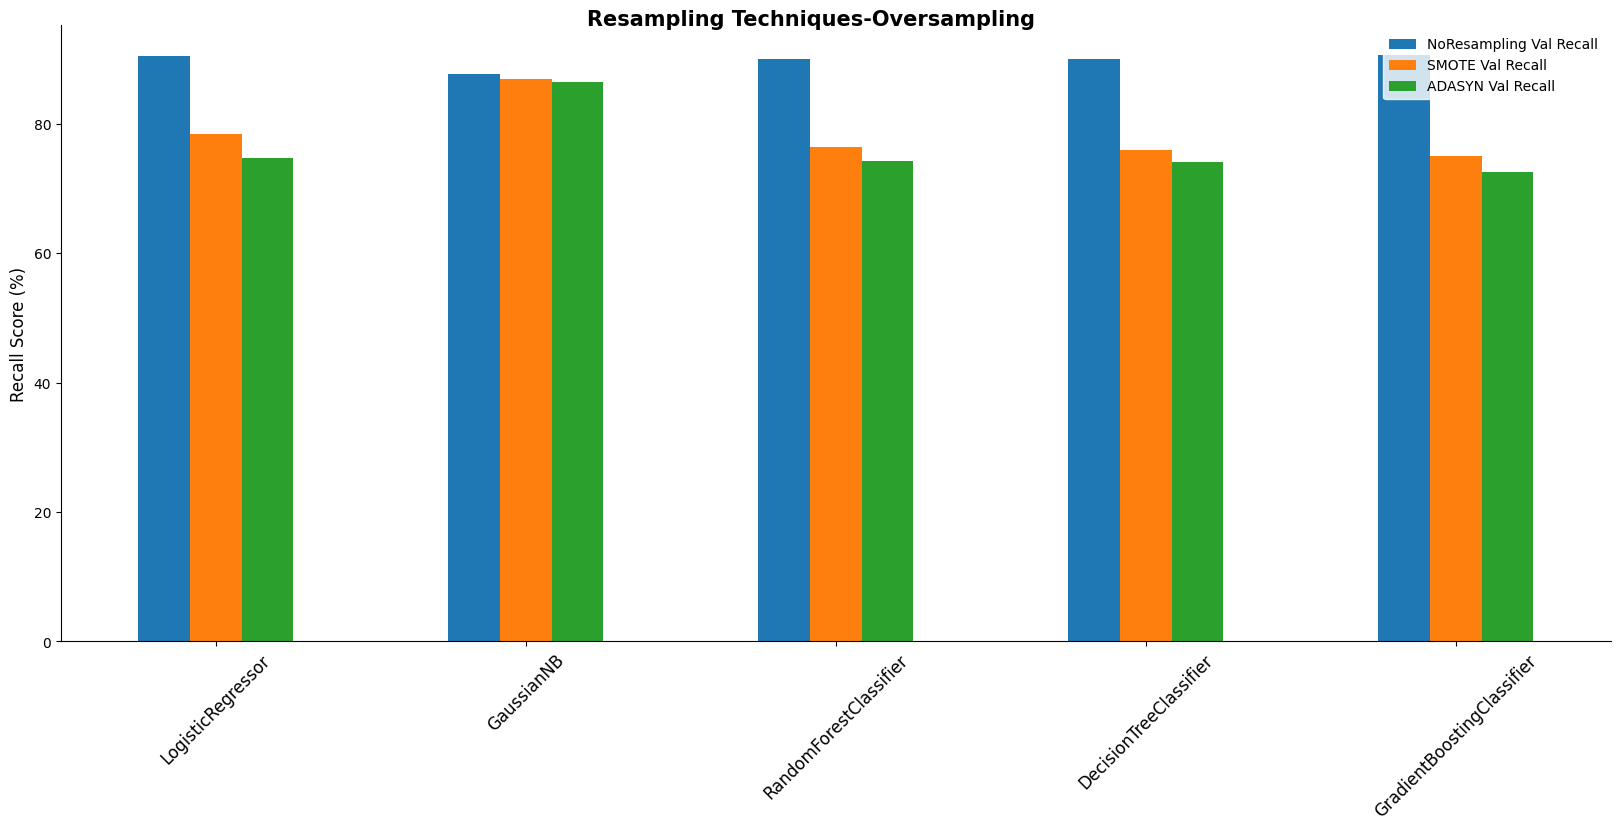

In [72]:
fig, ax = plt.subplots(figsize=(20, 8))
# Convert percentage strings to floats
for col in ps_over.columns:
    ps_over[col] = ps_over[col].str.rstrip('%').astype(float)
ps_over.plot.bar(ax=ax)
ax.set_ylabel('Recall Score (%)', fontsize=12)
for spine in ['right', 'top']:
        ax.spines[spine].set_visible(False)
ax.legend(edgecolor='white')
fig.suptitle("Resampling Techniques-Oversampling", size=15, y=0.9, weight='bold')
plt.xticks(rotation=45, fontsize=12)
plt.show()

Based on the results above, we can observe that oversampling techniques (SMOTE and ADASYN) did not improve our model's performance. In fact, they led to a decrease in recall scores across all models compared to no resampling.

We attempted oversampling because our target variable (Response) was imbalanced between classes 0 and 1, which can cause models to be biased towards the majority class. Oversampling techniques like SMOTE and ADASYN try to address this by creating synthetic samples of the minority class.

However, in this case, the original imbalance may not have been severe enough to warrant oversampling, or the synthetic samples may have introduced noise that made it harder for the models to learn the true patterns in the data. The base models were able to handle the moderate imbalance well without requiring oversampling techniques.


## Undersampling


In [73]:
# Define undersampling techniques
res_list = [('TomekLinks', TomekLinks()),
            ('NearMiss', NearMiss())]

outputs_u = []
for title, res in res_list:
    print(colored(title, 'red', attrs=['bold']).center(120, "-"))
    # Store the DataFrame returned by auto_ml
    results_df = auto_ml(X_trainval, y_trainval, models_dict, 
                        cv=StratifiedKFold(n_splits=5), res_t=res)
    outputs_u.append(results_df)  # Store the entire DataFrame
    display(results_df)  # Display the results

------------------------------------------------TomekLinks-------------------------------------------------


  0%|          | 0/5 [00:00<?, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

,Train Accuracy,Val Accuracy,Train Recall,Train Precision,Train F1,Train ROC AUC,Train GINI,Val Recall,Val Precision,Val F1,Val ROC AUC,Val GINI,Total Time
LogisticRegressor,90.50%,90.48%,90.50%,88.99%,88.96%,0.895,0.790,90.48%,88.95%,88.93%,0.894,0.789,2.01s
GaussianNB,87.74%,87.73%,87.74%,86.63%,87.11%,0.847,0.694,87.73%,86.63%,87.10%,0.846,0.691,3.65s
RandomForestClassifier,91.54%,90.11%,91.54%,90.54%,90.27%,0.925,0.849,90.11%,88.42%,88.60%,0.893,0.786,9.82s
DecisionTreeClassifier,91.54%,90.02%,91.54%,90.65%,90.06%,0.926,0.851,90.02%,88.20%,88.23%,0.866,0.733,3.61s
GradientBoostingClassifier,90.90%,90.69%,90.90%,89.61%,89.64%,0.912,0.824,90.69%,89.32%,89.41%,0.907,0.813,9.32s


-------------------------------------------------NearMiss--------------------------------------------------


  0%|          | 0/5 [00:00<?, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

,Train Accuracy,Val Accuracy,Train Recall,Train Precision,Train F1,Train ROC AUC,Train GINI,Val Recall,Val Precision,Val F1,Val ROC AUC,Val GINI,Total Time
LogisticRegressor,69.76%,84.80%,69.76%,70.51%,69.48%,0.775,0.549,84.80%,88.28%,86.17%,0.873,0.747,0.96s
GaussianNB,66.72%,79.66%,66.72%,70.63%,65.07%,0.746,0.493,79.66%,84.95%,81.85%,0.721,0.441,1.02s
RandomForestClassifier,74.26%,33.64%,74.26%,75.80%,73.87%,0.835,0.671,33.64%,77.31%,41.43%,0.546,0.092,3.05s
DecisionTreeClassifier,74.27%,36.93%,74.27%,75.89%,73.87%,0.836,0.671,36.93%,78.44%,45.18%,0.453,-0.094,0.83s
GradientBoostingClassifier,72.94%,56.37%,72.94%,74.30%,72.55%,0.817,0.634,56.37%,82.41%,62.79%,0.680,0.359,2.41s


In [74]:
# Create comparison DataFrame
ps_under = pd.DataFrame(index=models_dict.keys())
ps_under['NoResampling Val Recall'] = auto_run['Val Recall']
ps_under['TomekLinks Val Recall'] = outputs_u[0]['Val Recall']
ps_under['NearMiss Val Recall'] = outputs_u[1]['Val Recall']
ps_under

,NoResampling Val Recall,TomekLinks Val Recall,NearMiss Val Recall
LogisticRegressor,90.48%,90.48%,84.80%
GaussianNB,87.73%,87.73%,79.66%
RandomForestClassifier,90.04%,90.11%,33.64%
DecisionTreeClassifier,90.02%,90.02%,36.93%
GradientBoostingClassifier,90.69%,90.69%,56.37%


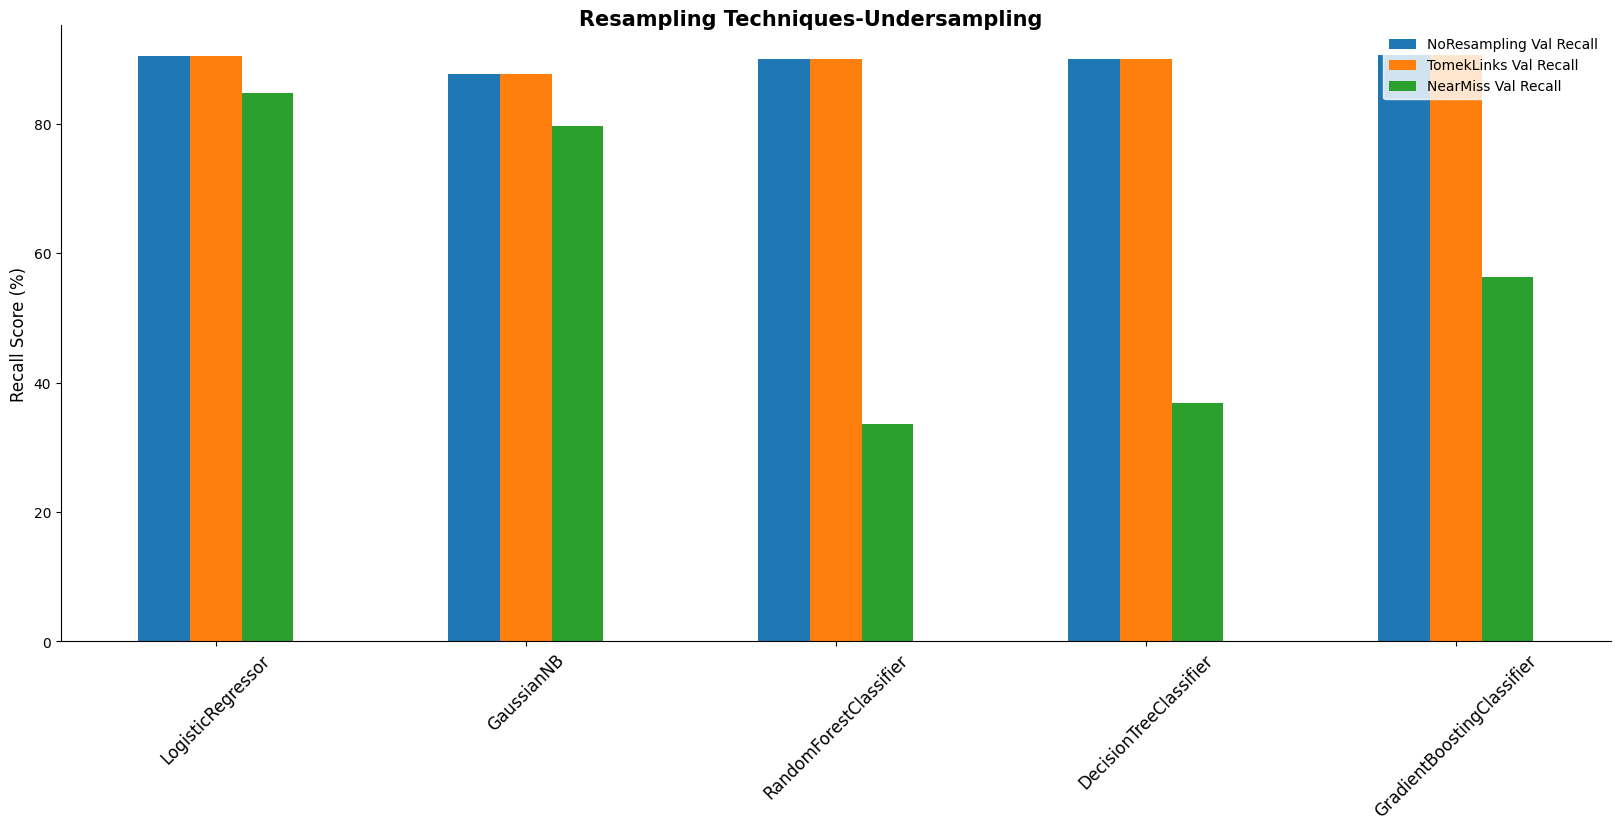

In [75]:
# Convert percentage strings to floats for plotting
for col in ps_under.columns:
    ps_under[col] = ps_under[col].str.rstrip('%').astype(float)

# Create visualization
fig, ax = plt.subplots(figsize=(20, 8))
ps_under.plot.bar(ax=ax)
ax.set_ylabel('Recall Score (%)', fontsize=12)
for spine in ['right', 'top']:
        ax.spines[spine].set_visible(False)
ax.legend(edgecolor='white')
fig.suptitle("Resampling Techniques-Undersampling", size=15, y=0.9, weight='bold')
plt.xticks(rotation=45, fontsize=12)
plt.show()

# Based on the results shown in the undersampling visualization, here's the interpretation:

## TomekLinks Performance
- TomekLinks (orange bars) showed very similar performance to no resampling (blue bars) across all models
- This suggests that TomekLinks had minimal impact on the data distribution, likely because it only removes a small number of borderline cases where majority class instances are too close to minority class instances

## NearMiss Performance 
- NearMiss (green bars) significantly degraded model performance across all classifiers
- The most dramatic drops were seen in:
  - RandomForestClassifier (from ~90% to ~33%)
  - DecisionTreeClassifier (from ~90% to ~37%) 
  - GradientBoostingClassifier (from ~90% to ~56%)
- Only LogisticRegression and GaussianNB maintained relatively better performance with NearMiss, though still worse than no resampling

## Overall Conclusion
- Similar to our oversampling results, undersampling techniques did not improve model performance
- In fact, NearMiss performed significantly worse than both no resampling and TomekLinks
- This suggests that:
  1. The original class imbalance might not be severe enough to require resampling
  2. NearMiss may be removing too many majority class samples, leading to loss of important information
- The base models are handling the moderate imbalance well without requiring undersampling

## Recommendation
- Based on both oversampling and undersampling results, it would be best to proceed with the original data without any resampling techniques
- The models are performing well with the natural class distribution, and any attempt to artificially balance the classes has either maintained or degraded performance